## Exercise 1
The number of claims received by an insurance company during a week follows a Poisson distribution with unknown mean (µ). <br>
The number of claims, per week, observed ovr a ten week period are: 
5, 8, 4, 6, 11, 6, 6, 5, 6, 4

(a) suppose to use a prior uniform distribution for µ
- find the posterior distribution for µ and compute the posterior mean, median and variance
- plot the posterior distribution and the 95% credibility interval

If we have n independent observations, $y_1, y_2, ..., y_n$, from a Poisson distribution with unknown rate parameter $\lambda$. Assuming a Uniform  prior distribution represented by a Gamma function with shape parameter $\alpha$ and rate parameter $\lambda$, the posterior distribution is a Gamma distribution with updated shape parameter $\alpha' = \alpha + \sum_{i=1}^n y_i$ and rate parameter $\lambda' = \lambda + n$.Therefore, the posterior distribution for $\mu$ is:

$$
p(\mu | \{y_i\}) = \frac{\lambda e^{-\lambda \mu}}{\Gamma(\alpha')} \mu^{\alpha' - 1}
$$

with $\alpha' = N+1 = 62$, and $\lambda = 10$. 

The posterior mean and variance are given by:

$$
E[\mu | \{y_i\}] = \frac{\alpha'}{\lambda},              Var[\mu | \{y_i\}] = \frac{\alpha'}{\lambda^2} 
$$

To find the posterior median, we can solve for $P(\mu \leq m | \{y_i\}) = 0.5$, where $m$ is the median. This can be done numerically, or by using the approximation $m \approx E[\mu] - 0.5/\lambda$.

In [1]:
library(ggplot2)

In [120]:
# our measurement dataset
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4) 

# Generate a sequence of values for x-axis
x <- seq(0, 12, length.out = 1000)

#Prior distibution
alpha0 <-1
lambda0 <-0 

# Posterior distribution
alpha <- sum(y) + alpha0
lambda <- length(y) + lambda0
U_posterior <- dgamma(x, shape = alpha, rate = lambda)
U_posterior_n <- U_posterior/sum(U_posterior)

# Posterior mean, median, and variance
U_post_mean <- alpha / lambda
U_post_median <- qgamma(0.5, alpha, scale = 1/lambda)
U_post_var <- alpha / lambda^2

# Print the results
cat("Posterior Mean:", U_post_mean, "\n")
cat("Posterior Median:", round(U_post_median,2), "\n")
cat("Posterior Variance:", round(U_post_var,1), "\n")

Posterior Mean: 6.2 
Posterior Median: 6.17 
Posterior Variance: 0.6 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”

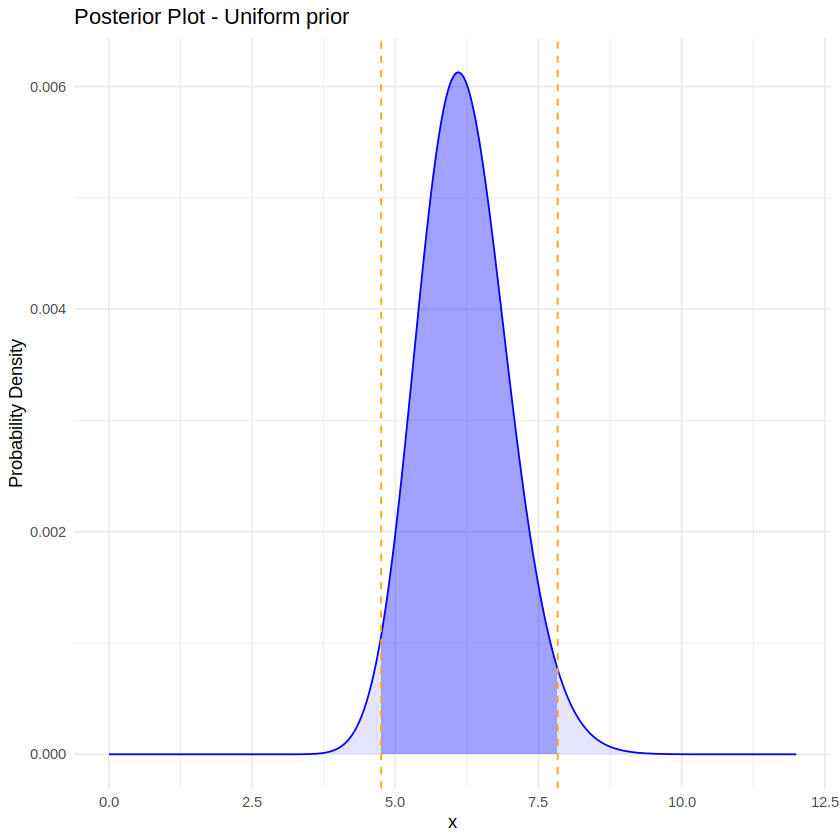

In [121]:
# Find values enclosing 0.95 probability 
U_confidence_interval <- qgamma(c(0.025, 0.975), shape = alpha, rate = lambda)

# Plot the gamma distribution 
df <- data.frame(x = x, U_posterior_n = U_posterior_n)
ggplot(df, aes(x = x, y = U_posterior_n)) + 
  geom_line(color = "blue", size = 0.5) + 
  geom_area(fill = "blue", alpha = 0.1) +
  geom_ribbon(aes(ymin = 0, ymax = U_posterior_n), fill = "blue", alpha = 0.3, 
               data = subset(df, x >= U_confidence_interval[1] & x <= U_confidence_interval[2])) +
  geom_vline(xintercept = U_confidence_interval[1], color = "orange", linetype = "dashed")+
  geom_vline(xintercept = U_confidence_interval[2], color = "orange", linetype = "dashed")+
  labs(title = "Posterior Plot - Uniform prior", x = "x", y = "Probability Density") + 
  theme_minimal()

(b) suppose to use a Jeffreys’ prior for µ (g(µ) ∝ 1/sqrtµ)
- find the posterior distribution for µ and compute the posterior mean, median and variance
- plot the posterior distribution and the 95% credibility interval

In [122]:
#Prior distibution
alpha0 <-1/2
lambda0 <-0 

# Posterior distribution
alpha <- sum(y) + alpha0
lambda <- length(y) + lambda0
J_posterior <- dgamma(x, shape = alpha, rate = lambda)
J_posterior_n <- J_posterior/sum(J_posterior)

# Posterior mean, median, and variance
J_post_mean <- alpha / lambda
J_post_median <- qgamma(0.5, alpha, scale = 1/lambda)
J_post_var <- alpha / lambda^2

# Print the results
cat("Posterior Mean:", J_post_mean, "\n")
cat("Posterior Median:", round(J_post_median,2), "\n")
cat("Posterior Variance:", round(J_post_var,1), "\n")

Posterior Mean: 6.15 
Posterior Median: 6.12 
Posterior Variance: 0.6 


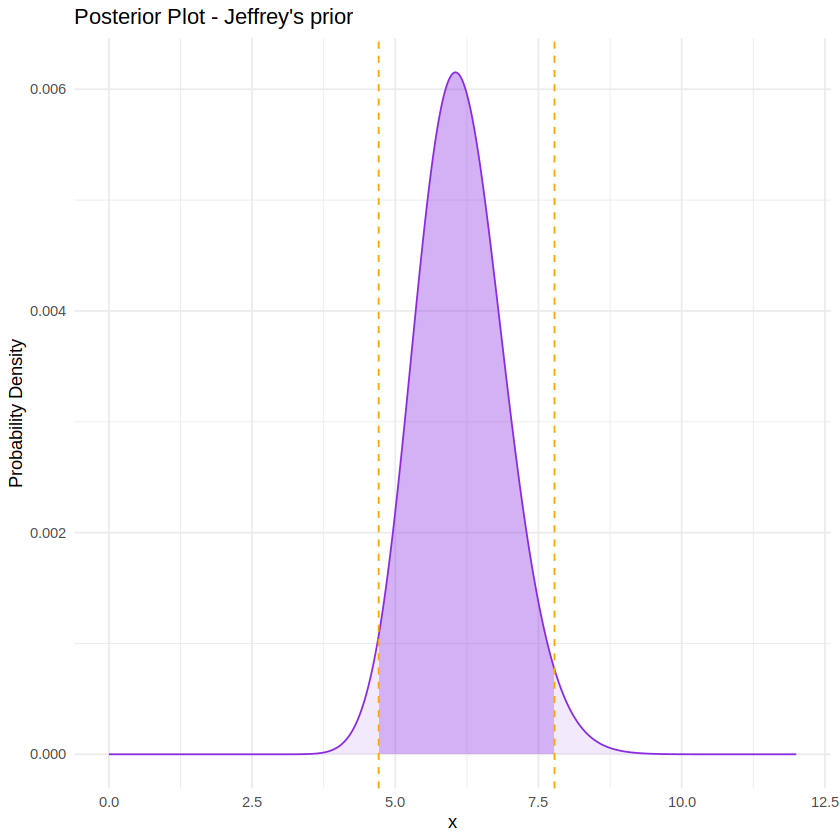

In [123]:
# Find values enclosing 0.95 probability 
J_confidence_interval <- qgamma(c(0.025, 0.975), shape = alpha, rate = lambda)

# Plot the gamma distribution 
df <- data.frame(x = x, J_posterior_n = J_posterior_n)
ggplot(df, aes(x = x, y = J_posterior_n)) + 
  geom_line(color = "blueviolet", size = 0.5) + 
  geom_area(fill = "blueviolet", alpha = 0.1) +
  geom_ribbon(aes(ymin = 0, ymax = J_posterior_n), fill = "blueviolet", alpha = 0.3, 
               data = subset(df, x >= J_confidence_interval[1] & x <= J_confidence_interval[2])) +
  geom_vline(xintercept = J_confidence_interval[1], color = "orange", linetype = "dashed")+
  geom_vline(xintercept = J_confidence_interval[2], color = "orange", linetype = "dashed")+
  labs(title = "Posterior Plot - Jeffrey's prior", x = "x", y = "Probability Density") + 
  theme_minimal()

(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same
mean and standard deviation

In [126]:
#Normal apporximation for the posterior distribution
#Uniform prior - normal approx. posterior
mean1 <-U_post_mean
sd1 <- U_post_var
gauss1 <-dnorm(x, mean1, sd1)
gauss_n1 <- gauss1 /sum(gauss1)

#Jeffrey's prior - normal approx. posterior
mean2 <-J_post_mean
sd2 <- J_post_var
gauss2 <-dnorm(x, mean2, sd2)
gauss_n2 <- gauss2/sum(gauss2)

#evaluate the CI
N1_confidence_interval <- qnorm(c(0.025, 0.975),  mean = mean1, sd = sd1)
N2_confidence_interval <- qnorm(c(0.025, 0.975),  mean = mean2, sd = sd2)

#summarize the results in a df and plot them
df <- data.frame (Prior  = c("Uniform prior", "Jeffrey's prior", "Normal approx. - Uniform p." , "Normal approx. - Jeffrey's p."), 
                  Mean = c(U_post_mean,J_post_mean,mean1,mean2),
                  Confidence_Interval = c(paste("[", round(U_confidence_interval[1], 2), ", ", round(U_confidence_interval[2], 2), "]", sep = ""),
                                            c(paste("[", round(J_confidence_interval[1], 2), ", ", round(J_confidence_interval[2], 2), "]", sep = "")),
                                              c(paste("[", round(N1_confidence_interval[1], 2), ", ", round(N1_confidence_interval[2], 2), "]", sep = "")),
                                                c(paste("[", round(N2_confidence_interval[1], 2), ", ", round(N2_confidence_interval[2], 2), "]", sep = ""))),
                  sx = c(U_post_mean-U_confidence_interval[1],J_post_mean-J_confidence_interval[1],mean1-N1_confidence_interval[1],mean2-N2_confidence_interval[1]),
                  dx = c(U_confidence_interval[2]-U_post_mean,J_confidence_interval[2]-J_post_mean,N1_confidence_interval[2]-mean1,N2_confidence_interval[2]-mean2)
                    )
df1 <- df[,c('Prior','Mean','Confidence_Interval')]
df1

Prior,Mean,Confidence_Interval
Uniform prior,6.20,"[4.75, 7.84]"
Jeffrey's prior,6.15,"[4.71, 7.78]"
Normal approx. - Uniform p.,6.20,"[4.98, 7.42]"
Normal approx. - Jeffrey's p.,6.15,"[4.94, 7.36]"


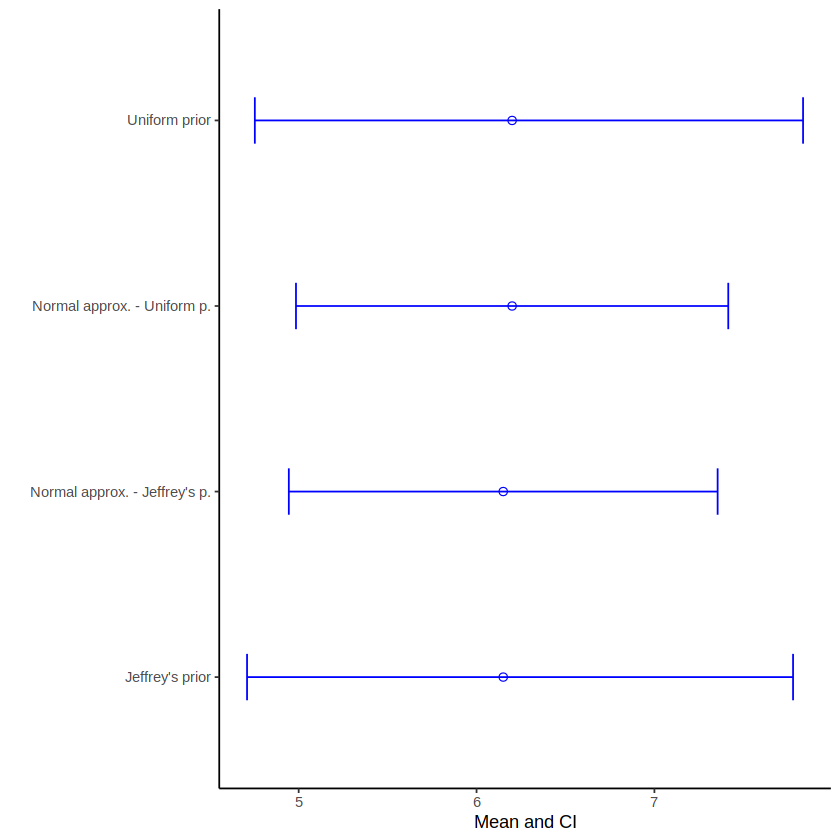

In [127]:
ggplot(df, aes(x=Prior, y=Mean)) + 
  geom_point(aes(y = Mean), shape = "circle open", size=2, color="blue") +
  geom_errorbar(aes(x=Prior, ymin=Mean-sx, ymax=Mean+dx), color="blue", width=0.25)+
  coord_flip() +
  labs(x = "", y = "Mean and CI") +
  scale_fill_manual(values = c("green", "red")) +
  theme_classic()

## Exercise 2
A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

a) what is the probability distribution of y, the number of times the new method fails to detect the
disease ? <br>
To calculate the prior and posterior probabilities, we need to specify a prior distribution for the probability of failure. In the absence of any other information, a common choice is to assume a uniform prior, which assigns equal probability to all possible values of p between 0 and 1.
The likelihood is binomial so also the posterior pdf is binomial.

In [1]:
library(ggplot2)

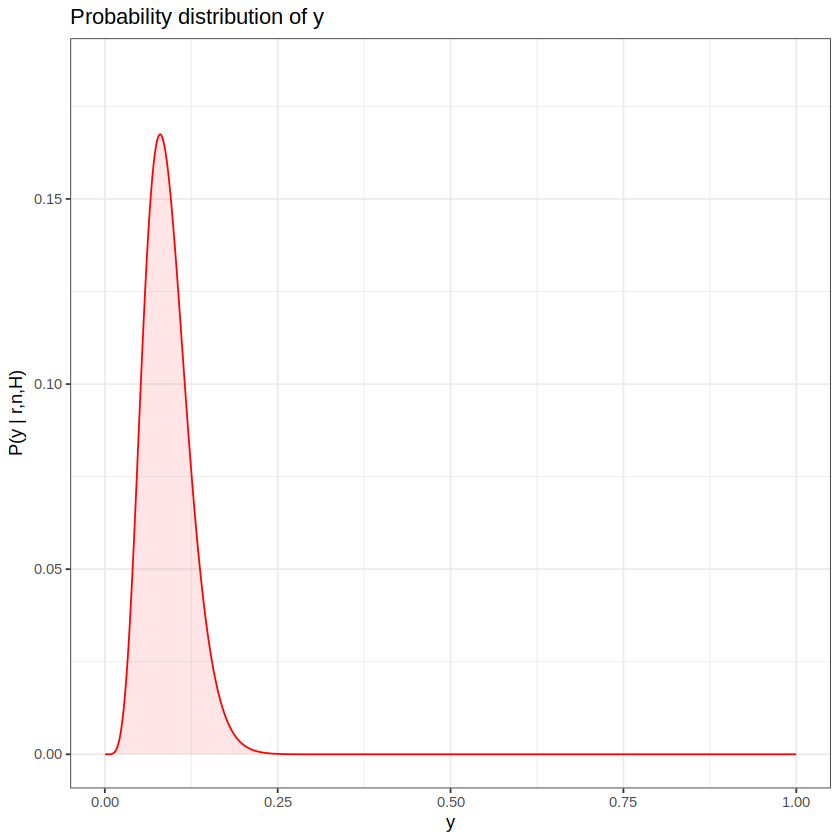

In [128]:
#Preliminary definitions 
# D := a person has a disease
# T := the test gives a positive result

n <- 75 # patients known to have the disease 
y <- 6 #number of failures
n_sample <-2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample ) # Probability of failure
posterior <- dbinom(y, n, p) # PMF of failures

#Plot
ggplot(data = data.frame(x = p, y = posterior), aes(x = x, y = y)) + 
    geom_line(color = "red") +
    geom_area(fill = "red", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(posterior)) +
    xlim(0, 1) +
    xlab("y") +
    ylab(expression(paste(P, "(y | r,n,H)"))) +
    ggtitle("Probability distribution of y")

b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method ? <br>
In frequentist approach, the probability of observing a certain outcome is not a parameter that is estimated, but rather a fixed value determined by the underlying distribution and the observed data, therefore, we cannot talk about the probability of the failure rate. In this case, given the observed data of y = 6 failures out of 75 patients, the frequentist estimator of the failure probability is simply given by the ratio y/n.

In [11]:
freq_failure <- y/n
cat('The frequentist estimator of the failure probability is: ', freq_failure)

The frequentist estimator of the failure probability is:  0.08

c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
the mean value and variance. <br>
The mean and sample size parameters of the beta prior are related to the shape parameters $\alpha$ and $\beta$ via this equation:
$$ \alpha = \frac{-\mu^3+\mu^2-\mu \sigma}{\sigma}$$ 
$$\beta = \frac{(\mu-1) \left(\mu^2-\mu+\sigma\right)}{\sigma}$$

In [129]:
library(nleqslv)

#Find out the values of alpha and beta from mean and variance
#Unismg nleqslv library

eqn <- function(x) {
  # Extract the variables from the input vector
  alpha <- x[1]
  beta <- x[2]
  
  # Define the equations to solve
  eq1 <- alpha / (alpha + beta) - mean
  eq2 <- alpha * beta / ((alpha + beta)^2 * (alpha + beta + 1)) - variance^2
  
  # Return the equation vector
  c(eq1, eq2)
}

# Initial guess for alpha and beta
x0 <- c(1, 1)

# Values for mean and variance
mean <- 0.15
variance <- 0.14 

# Solve the equations
sol <- nleqslv(x = x0, fn = eqn)

# Extract the solutions
alpha <- sol$x[1]
beta <- sol$x[2]

# Print the solutions
cat("The solutions are alpha =", alpha, "and beta =", beta, "\n")

The solutions are alpha = 0.8257653 and beta = 4.679337 


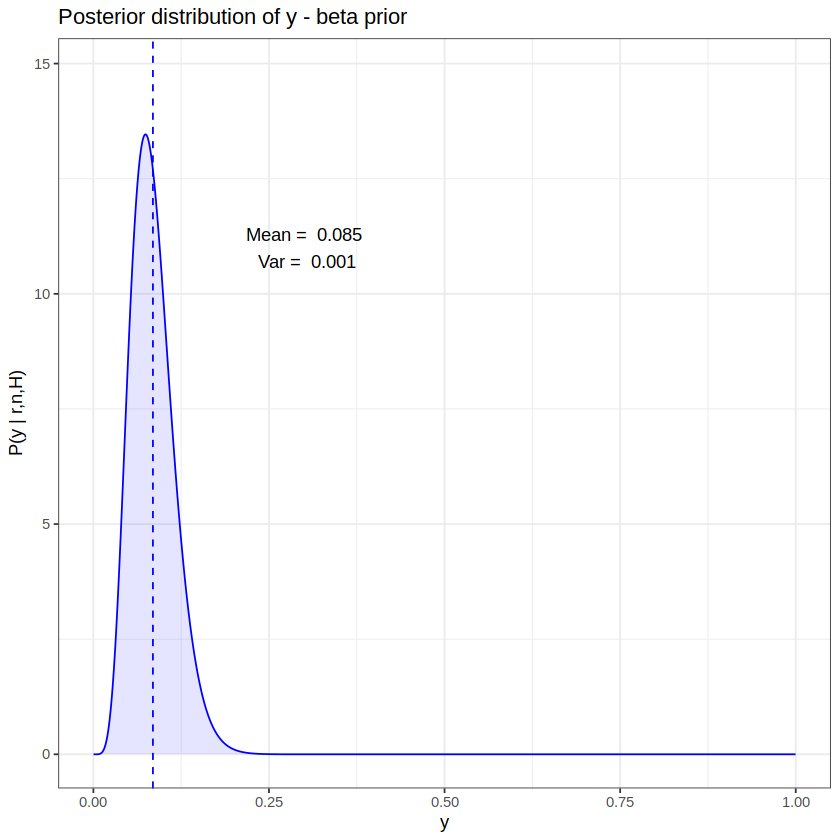

In [130]:
# Define prior beta function
beta_prior_function <- function(p, alpha, beta) {
  beta_dist <- dbeta(p, alpha, beta)
  beta_n <- beta_dist/sum(beta_dist)
  return(beta_n)
}

# Define likelihood function
likelihood_function <- function(y, n, p) {
  likelihood <- dbinom(y, n, p)
  likelihood_n <- likelihood/sum(likelihood)
  return(likelihood_n)
}

# Define posterior beta function
beta_post_function <- function(p, alpha, beta, y, n) {
  beta_dist <- dbeta(p, alpha+y, beta+n-y)
  beta_n <- beta_dist/sum(beta_dist*delta)
  return(beta_n)
}
#p <- seq(0, 1, by = 0.001) # Probability of failure

prior <- beta_prior_function(p, alpha, beta)
likelihood <- likelihood_function(y,n,p)
posterior <- beta_post_function(p, alpha, beta, y, n)

#compute first and second moment
beta_mean <- (alpha+y) /( alpha + beta+n)
beta_var <- ((alpha+y) /( alpha + beta+n)**2)*(beta+n-y)/(alpha+beta+n+1)
beta_var_2 <- sum(p*p*posterior)-beta_mean**2  #equivalent calculation

ggplot(data = data.frame(x = p, y = posterior), aes(x = x, y = y)) + 
    geom_line(color = "blue") +
    geom_vline(xintercept = beta_mean, color = "blue", linetype = "dashed")+
    geom_area(fill = "blue", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(posterior)) +
    xlim(0, 1) +
    xlab("y") +
    ylab(expression(paste(P, "(y | r,n,H)"))) +
    annotate("text", x = 0.3, y = 11, label = paste(' Mean = ',round(beta_mean, digits=3), '\n Var = ', round(beta_var,3)))+
    ggtitle("Posterior distribution of y - beta prior")


d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in
ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test
the sample at a 5% level of significance in the Bayesian way.

#### Theoretical notes and main results
First we introduce some notation: <br>
- $p$ = fraction of patients who have received an incorrect diagnosis<br>
- $p_0$ = fraction of patients who have received an incorrect diagnosis from the standard test = 0.15  <br>
We know that $n = 75$ patients are tested  with the new test and we observe that $y = 6$ patients received a correct diagnosis.

Then, we set up the null hypothesis: $H_0: p \geq 0.15$, which states that the new test is not better than the standard one.  <br>
The alternative hypothesis, $H_1: p < 0.15$, represents the idea that the new test is better. We choose a level of significance $\alpha = 5%$. We evaluate the posterior probability of the null hypothesis (in the previous point) , and integrate over the required region to estimate the p-value: $$P(H_0:  p \geq 0.15  |y) = \int_{p_0}^{1} g(p|y) d p,$$ where $g(p|y)$ indicates the posterior distribution for y (=number of test failing) which in this exemple is a beta. The p-value is the probability of getting sample evidence as or more extreme than what we actually observed given that the null hypothesis is actually true. Once the p-value has been calculated, the “decision rule” can be described as follows.
- if p-value $\leq \alpha$  reject $H_0$ 
- if p-value > $\alpha$  fail to reject  $H_0$
 
 The result, 3.1%, is lower than $\alpha$ = 5%,
therefore we can reject the null hypothesis at the 5% level of significance and conclude that the new test is better than the standard one. 

This means that if the failing percentage of the new test is more than 0.15, there is a 0.03% chance that we would have observed sample evidence as or more extreme than what we did observe. This is much smaller than the 5% error rate we can tolerate. Therefore, we decide to reject the null hypothesis and conclude that it is more likely that thethe new test error rate is less than 0.15.

Using this approach we can state that the test has produced a significant result.

The p-value is: 0.031

Warning message:
“Removed 1000 rows containing non-finite values (`stat_align()`).”Warning message:
“Removed 1000 rows containing missing values (`geom_line()`).”

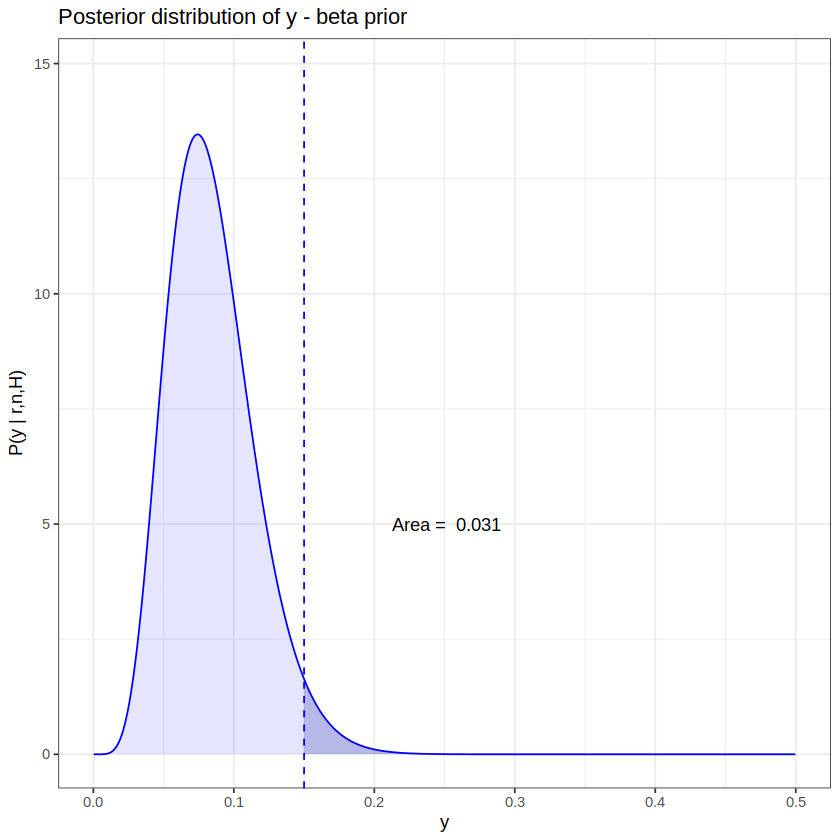

In [131]:
n <- 75 # number of patients
y <- 6 # number of good diagnostics
p0 <- 0.15 # hypothesized probability of good diagnosic under H0
level_significance <- 0.05

#P-value
p_value <- sum(posterior[p>=0.15])/sum(posterior)
cat("The p-value is:", round(p_value,3))

#Plot
ggplot(data = data.frame(x = p, y = posterior), aes(x = x, y = y)) + 
    geom_line(color = "blue") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "navy", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior), x >= 0.15)) +
    geom_vline(xintercept = 0.15, color = "blue", linetype = "dashed")+
    geom_area(fill = "blue", alpha = 0.1) +
    theme_bw()+
    ylim(0, 1.1*max(posterior)) +
    xlim(0, 0.5) +
    xlab("y") +
    ylab(expression(paste(P, "(y | r,n,H)"))) +
    annotate("text", x = 0.25, y = 5, label = paste(' Area = ',round(p_value, digits=3)))+
    ggtitle("Posterior distribution of y - beta prior")


e) Perform the same hypothesis test in the classical frequentist way.
In this case the null distribution of the test statistic is the sampling distribution of the test statistic, given that the null hypothesis is true : rbinom(y,n,p=0.15)

#### Main results
In Frequentis hypothesis testing, the p-value of 0.054 indicates that we fail to reject the null hypothesis. However, since the observed value of y=6 falls in the rejection region, we reject the null hypothesis that the new test is not better than the standard one.

The p-value is :  0.054 .We fail to reject the H0 
y = 6 lies in the rejection region, so we reject H0

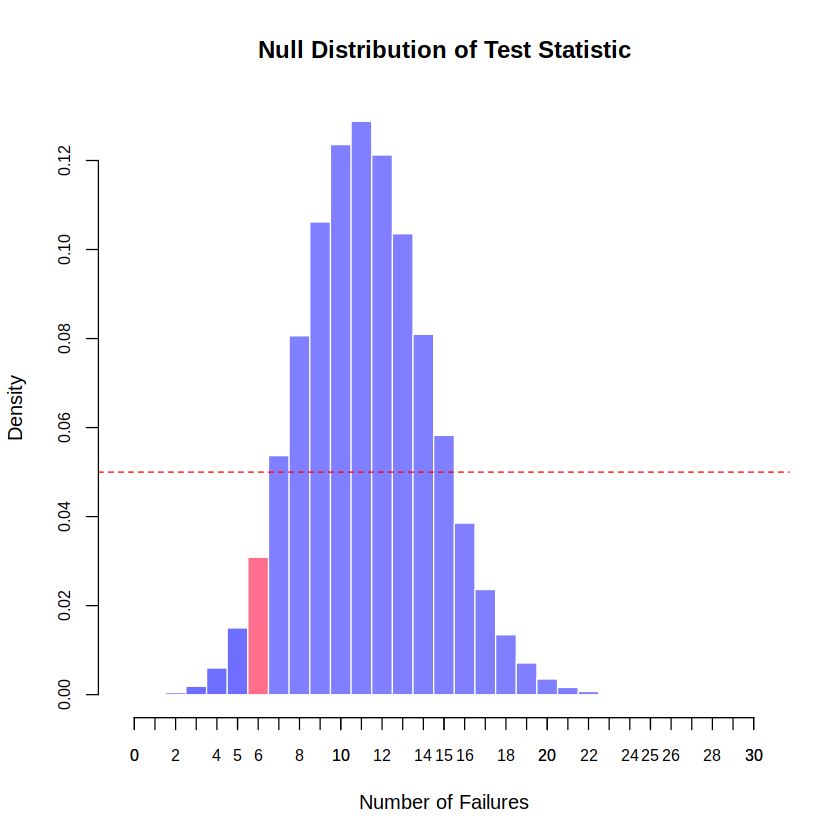

In [50]:
n <- 75 # number of patients
y <- 6 # number of good diagnostics
p0 <- 0.15 # hypothesized probability of good diagnosic under H0
level_significance <- 0.05

# Generate 10,000 samples from the null distribution
null_dist <- rbinom(1e7, size = n, prob = p0)

#P-value
p_value <- sum(null_dist <= y)/length(null_dist)
p_bigger_alpha <- (p_value >= level_significance)
if (p_bigger_alpha ==TRUE){ cat('The p-value is : ', round(p_value,3), '.We fail to reject the H0 \n')}
if (p_bigger_alpha ==FALSE){ cat('The p-value is : ', round(p_value,3), '.We reject the H0 \n')}


# Plot the null distribution
par(cex.axis = 0.8)
hist(null_dist,
     breaks=seq(-0.5, max(null_dist)+0.5, by=1),
     col=c(rep('#0000FF90',6), '#FF003390',rep('#0000FF80',16) ),
     border='white',
     main="Null Distribution of Test Statistic",
     xlab="Number of Failures",
     ylab = "Density",
     xlim = c(-0.5, max(null_dist)+0.5),
     freq=FALSE
)

# Add axis labels
axis(1, at=0:max(null_dist), labels=0:max(null_dist))

# Add horizontal line
abline(h=level_significance, lty=2, col="red")

#print results
cat('y = 6 lies in the rejection region, so we reject H0')

## Exercise 3
Given the problem of the lightouse discussed last week, study the case in which both the position
along  the shore (α) and the distance out at sea estimation (β) are unknown

The position along the x axis is given by $x = \beta \tan \theta + \alpha$ . <br>
The rule of variable transformation, $p(x)dx=p(\theta)d\theta$, allows us to  finally obtain : $p(x | \alpha, \beta) = p(\theta | \alpha, \beta) \left| \frac{d\theta}{dx} \right| = \frac{1}{\pi} \frac{\beta}{(x-\alpha)^2 + \beta^2}$

In order to calculate the Posterior we use the Bayes theorem: $$p(\alpha, \beta | \{x_k\}) \propto p(\{x_k\} | \alpha, \beta) p(\alpha) p(\beta)$$

- The priors $p(\alpha) $and$ p(\beta)$ can be modelled by a uniform probability distribution over a large enough segment $[x_{min}, x_{max}] $ and $[0,y_{max}]$, respectivly:  $p(\alpha) = 1/(x_{max}-x_{min}), $ <br>  $p(\beta) = 1/(y_{max}).$ <br>
- The likelihood is given by :
- If the prior is uniform, the posterior is proportional to the likelihood  $p(\alpha, \beta | \{x_k\}) \propto p(\{x_k\} | \alpha, \beta).$ <br>

We commence by setting the true values for alpha and beta. We note that a uniform likelihood is assumed for the angle theta (because the emissions are uniformly distributed in $\theta$), and accordingly, we generate the corresponding sequence of observed positions x_k. Next, a grid of alpha and beta values is generated within a range surrounding the true values, after which the log posterior is computed, followed by the posterior.
In conclusion, a plot of the posterior is generated, and the most probable values of $\alpha$ and $\beta$ are extracted. 

In [1]:
#the posterior, assuming a uniform prior, is proportional to the likelihood
posterior <- function(x_k, alpha, beta) { 
  return(beta/pi) / (beta^2 + (x_k - alpha)^2)
}

# this function computes the natural logarithm of the posterior probability function
log_posterior <- function(x_k, alpha, beta) {
  return(sum(log((beta/pi) / (beta^2 + (x_k - alpha)^2))))
}


In [2]:
#set the unknown true values of alpha and beta
alpha_t <- 1
beta_t <- 3

# We generate the imput data,
# assuming a uniform likelihood for the theta_k angle between [-pi/2,pi/2]
set.seed(123)
N <- 500
theta_k <- runif(N,-pi/2,pi/2)
x_k <- beta_t * tan(theta_k) + alpha_t

#Define the range for alpha and beta  
x_min <-  -1
x_max <- 2
y_max <- 5

M <- 1000
alphas <- seq(from=x_min, to=x_max, length.out=M)
betas <- seq(from=1, to=y_max,  length.out=M)


#compute the log_posterior
compute_log_like <- function(x_k, alphas, betas){
    log_post <- matrix(0, nrow = length(alphas), ncol = length(betas))
    for (i in seq(1,length(alphas),1)){
        for(j in seq(1,length(betas),1)){
            log_post[i,j] <- log_posterior(x_k, alphas[i], betas[j])
        }
    }
    return(log_post)
}

#compute the posterior function 
compute_post <- function(x_k, n_plot, alphas, betas){
    dt <- x_k[20:n_plot+20]
    log_star <- compute_log_like(dt, alphas, betas)
    post_star <- exp(log_star)
    post <- post_star/(sum(post_star))
    return(post)
}    
post <- compute_post(x_k, 12, alphas, betas)

In [5]:
# Find the maximum value of the posterior and its corresponding alpha and beta
max_post <- max(post)
max_index <- which.max(post)
max_alpha <- alphas[max_index %/%( length(alphas) + 1)]
max_beta <- betas[max_index %/% (length(betas)+1)]

cat("Maximum posterior value:", max_post, "\n")
cat("Corresponding alpha:", max_alpha, "\n")
cat("Corresponding beta:", max_beta, "\n")


Maximum posterior value: 1.780014e-06 
Corresponding alpha: 0.7807808 
Corresponding beta: 3.374374 


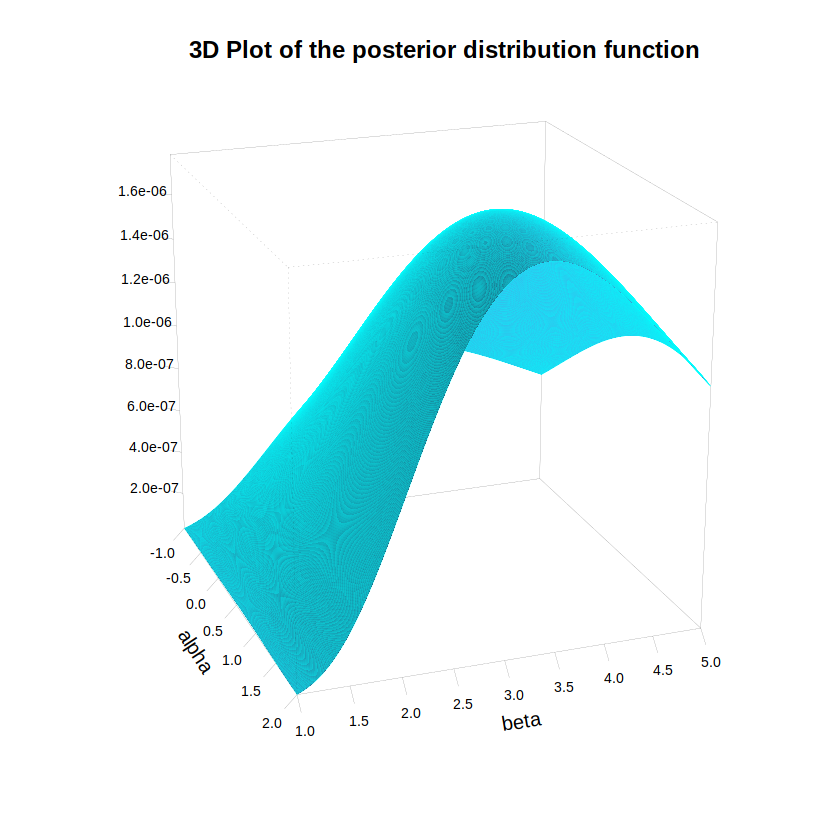

In [6]:
#3d plot of the posterior in the grid alpha beta
persp(alphas, betas , post,
      xlab=bquote(alpha), ylab=bquote(beta), zlab="", 
      main="3D Plot of the posterior distribution function" , cex=0.7, lwd=0.1  , 
      xlim=c(x_min,x_max), ylim=c(1,y_max), zlim=c(range(post)),
      theta=70, phi=20, d=5.0,  col = "cornflowerblue", border = 'cyan', shade=0.5,
      box = TRUE, axes = TRUE, nticks = 10,ticktype = "detailed", cex.axis=0.7)

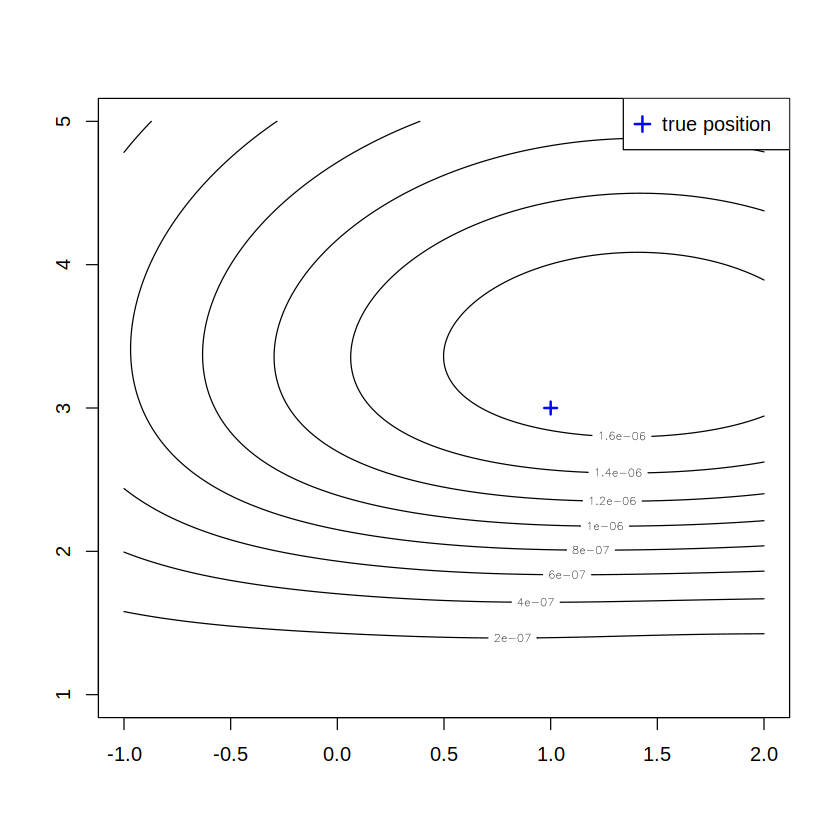

In [83]:
contour(alphas, betas, post, xlim=c(x_min,x_max), ylim=c(1,y_max))
points(alpha_t, beta_t, pch=3, col="blue", lwd=2) # true value
legend("topright",c("true position"), col="blue", pch=3, pt.cex=1.2, pt.lwd=2) 

The last plot shows that the most probable values of ($\alpha, \beta$) fall within the smallest circle of the posterior distribution represented in the contour plot, meaning that the true parameter values are within the region of maximum probability density estimated from the observed data. This indicates that the estimated parameter values are quite accurate and close to the true parameter values of the model.

## Exercise 3
Given the Signal over Background example discussed, the task is to analyze and discuss the following : 

(a) Vary the sampling resolution w used to generate the data, keeping the same azimuth. xdat <- seq(from=-7*w, to=7*w, by=0.5*w). <br>
- change the resolution w = {0.1, 0.25, 1, 2, 3}
- check the effects on the result

The number of expected photons is : $\mathrm{S} = t \left(a \exp \left(-\frac{(x-x_0)^2}{2w^2}\right) + b\right)$ <br>
Where the parameters are: 
- x0 is the signal center (peak)
- w is the signal width
- A is the signal amplitude
- B is the background amplitude
- Delta t is the exposure time

The number of observed photons follows a Poisson distribution with $\lambda = S$

#### a.1) Function definition

In [70]:
#Definition of all the functions that are used in this code

# Generate the signal S 
generate_signal <- function (x, a, b, x0, w, t) {
t * (a*exp (-(x-x0)**2/(2*w**2)) + b)
}

#Define a grid sampling for computing the posterior
compute_sampling_grid <- function(alim, blim, Nsamp) {
  uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)
  delta_a <- diff(alim)/Nsamp
  delta_b <- diff(blim)/Nsamp
  a <- alim[1] + diff(alim)*uniGrid
  b <- blim[1] + diff(blim)*uniGrid
  return(list(a = a, b = b, delta_a=delta_a, delta_b=delta_b ))
}

# Log posterior
log.post <- function (d, x, a, b, x0, w, t) {
if(a<0 || b <0) { return (-Inf )} # the effect of the prior
sum(dpois(d, lambda = generate_signal(x, a, b, x0, w, t), log=TRUE ))
}    


#normalized marginalized posteriors
compute_posteriors <- function(z, delta_a, delta_b) {
  p_a_D <- apply(exp(z), 1, sum) #z is the log posterior
  p_a_D <- p_a_D / (delta_a * sum(p_a_D))
  p_b_D <- apply(exp(z), 2, sum)
  p_b_D <- p_b_D / (delta_b * sum(p_b_D))
  return(list(p_a_D = p_a_D, p_b_D = p_b_D))
}


# Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
compute_conditional_posteriors <- function(data, x, a, b, B.true , x0, w, Delta.t ){    
    p_a_bD <- exp( Vectorize (log.post , "a")(data , x , a, B.true , x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")( data , x , A.true , b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))
    return(list(p_a_bD = p_a_bD, p_b_aD = p_b_aD))
}

#### a.2) Data generation

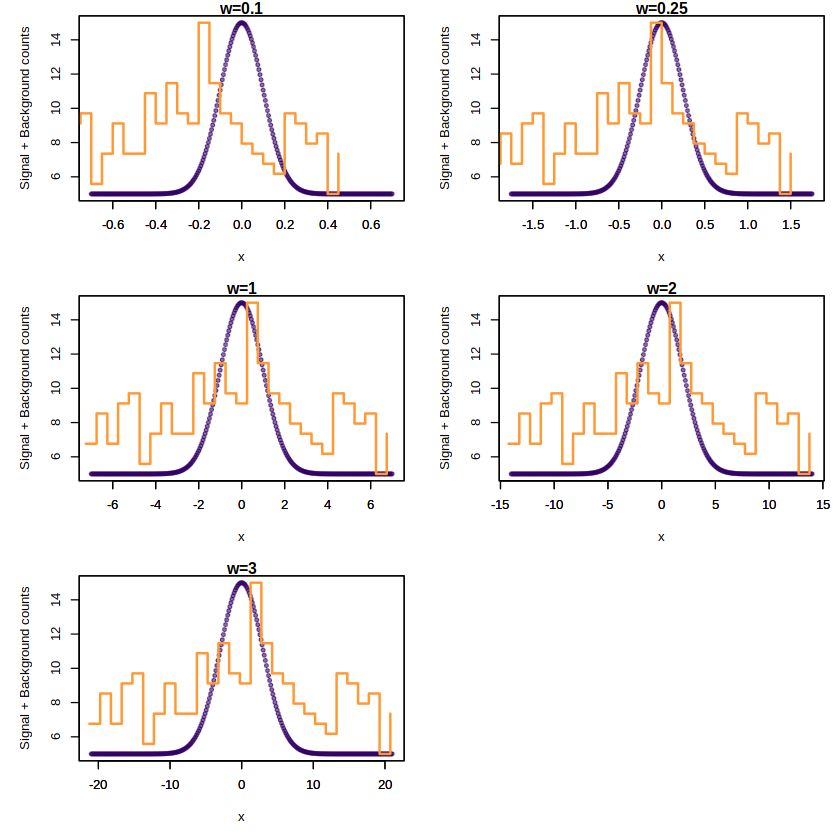

In [132]:
# Define the parameters of the model
x0 <- 0                                 #Signal center (peak)
w_list<- c(0.1, 0.25, 1, 2, 3)   #Signal width
A.true <- 2                         #Signal amplitude
B.true <- 1                         #Background amplitude
Delta.t <- 5                       #Exposure time


par(mfrow=c(3,2), mar=c(5,5,1,1))
x_list <- vector(mode = "list", length = length(w_list))
data_list <- vector(mode = "list", length = length(w_list))

for (i in 1:length(w_list)) {
    
    # Generate the S (expected data) and the observed data
    set.seed(123)
    x <- seq(from=-7*w_list[i], to=7*w_list[i], by=0.5*w_list[i])                 #values {x_k}
    s_x <- generate_signal (x , A.true , B.true , x0, w_list[i], Delta.t)       #expected photons S_k 
    data <- rpois( length(s_x), s_x)                                                                       #random sample of Poisson distribution, observed photons
    
    #keep data and x_k in memory
    x_list[[i]] <- x 
    data_list[[i]] <- data
    
    xplot <- seq(from=-7*w_list[i], to=7*w_list[i], by=0.05*w_list[i])
    splot <- generate_signal (xplot , A.true , B.true , x0, w_list[i], Delta.t)
    plot(xplot , splot , pch=20, col = '#33006690', xlab="x", ylab=" Signal + Background counts ", 
    main=paste0("w=",w_list[i]))
    
    x.off <- x - 0.25
    par(new=TRUE)
    plot(x.off , data , type='s',col='#FF9933', xlab='', ylab='', yaxt="n",
    lwd=2, xlim=range( xplot), ylim= range(c(splot , data )))
}


#### a.3) Computing posterior

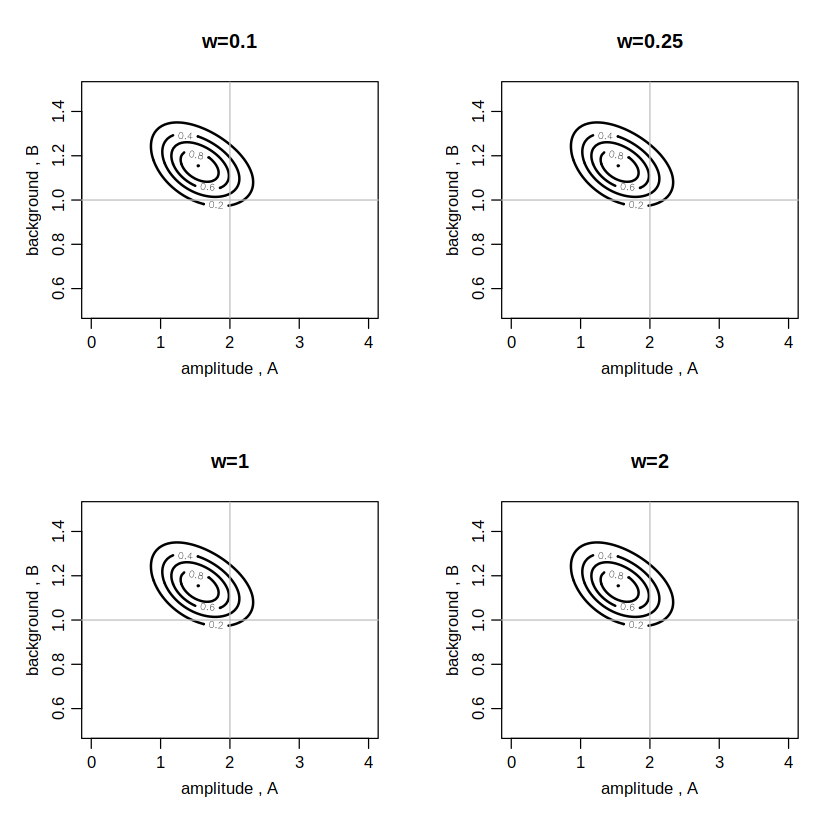

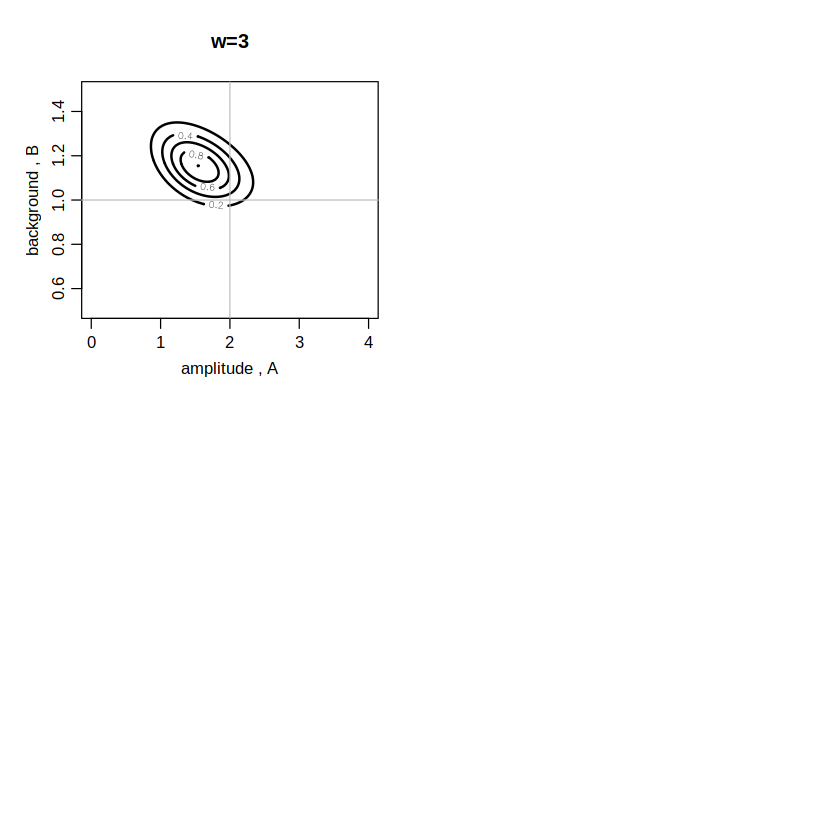

In [133]:
#Sampling grid for computing posterior
alim <- c(0.0, 4.0)  #a_true=2
blim <- c(0.5, 1.5) #b_true = 1
Nsamp <- 100

grid <- compute_sampling_grid(alim, blim, Nsamp)
a <- grid$a
b <- grid$b
delta_a <- grid$delta_a
delta_b <- grid$delta_b

# Loop over each value of w and produce a contourplot of the posterior for each
par(mfrow=c(2, 2), mar=c(5, 4, 4, 2) + 0.1, mgp=c(2, 0.7, 0))
z_list <- vector(mode = "list", length = length(w_list))

for (i in 1:length(w_list)) {
    w <- w_list[i]
    x <-  x_list[[i]] 
    data <-  data_list[[i]] 
    
# Compute log unnormalized posterior, z = ln P*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
        z[j,k] <- log.post(data, x, a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    z_list[[i]] <- z

  # Plot unnormalized 2D posterior as contour plot
  contour(a, b, exp(z), nlevels=5, labcex=0.5, lwd=2, xlab="amplitude , A", ylab="background , B", main=paste0("w=", w))
  abline(v=2, h=1, col="grey")
}

linetype,label
____,"p(b|D), p(a|D)"
- - - -,"p(b|a,D), p(a|bD)"


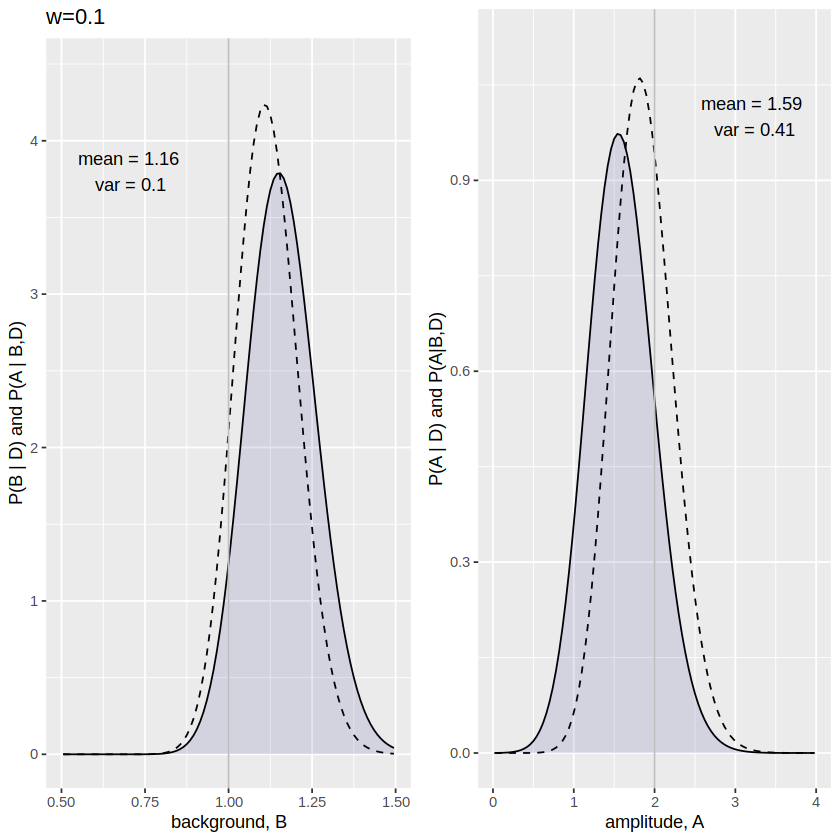

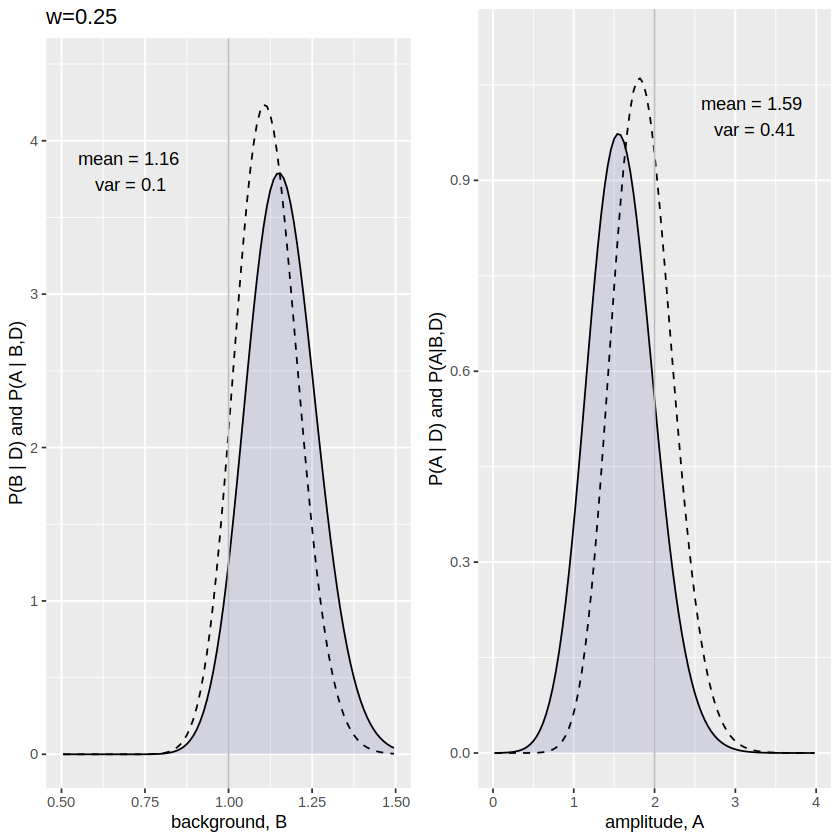

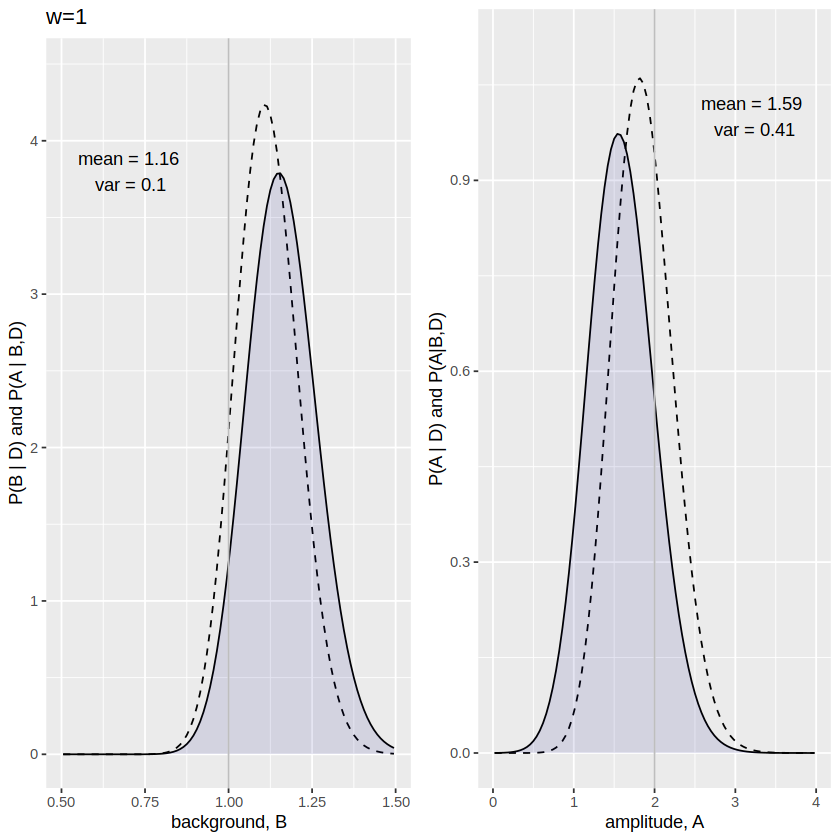

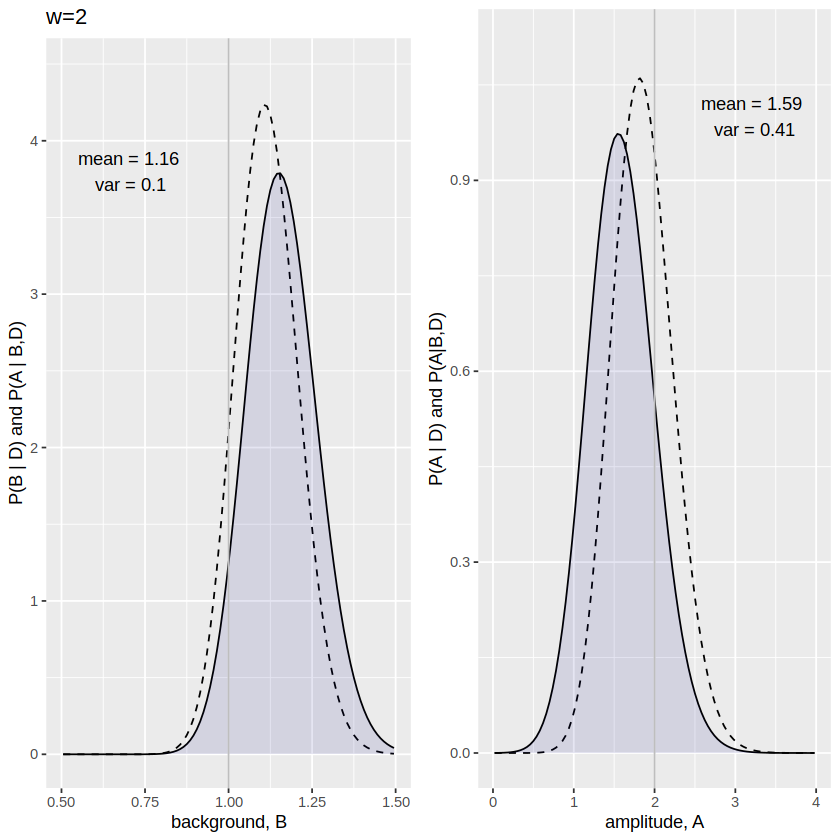

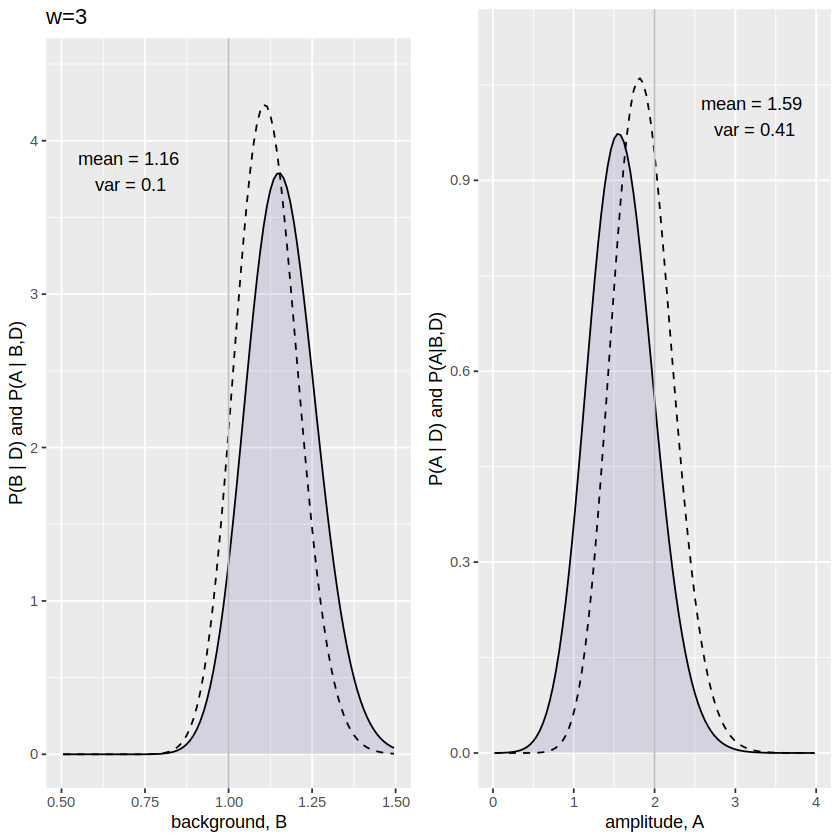

In [152]:
library(ggplot2)
library(gridExtra)

legend_df <- data.frame(
  linetype = c("____", "- - - -"),
  label = c("p(b|D), p(a|D)", "p(b|a,D), p(a|bD)")
)
legend_df

for (i in 1:length(w_list)) {
    z <- z_list[[i]] 
    w <- w_list[i]
    x <-  x_list[[i]] 
    data <-  data_list[[i]] 
    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    result <- compute_posteriors(z = z, delta_a = delta_a, delta_b = delta_b)
    p_a_D <- result$p_a_D
    p_b_D <- result$p_b_D

    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    result_c <- compute_conditional_posteriors(data, x, a, b, B.true , x0, w, Delta.t )
    p_a_bD <- result_c$p_a_bD
    p_b_aD <-  result_c$p_b_aD
    
    #Compute mean and variance for a and b
    mean_a <-delta_a * sum(a * p_a_D)
    mean_b <-delta_b * sum(b * p_b_D)
    sd_a <-sqrt( delta_a * sum ((a-mean_a)**2 * p_a_D) )
    sd_b<-sqrt( delta_b * sum ((b-mean_b)**2 * p_b_D) )
    
    # Plot the 1D marginalized posteriors
    # Create data frame
    df <- data.frame(b, p_b_D, p_b_aD)
    df2 <- data.frame(a, p_a_D, p_a_bD)

    # Create plots
    plot0 <- ggplot() +
  scale_linetype_manual(name = "Legend", values = c("solid", "dashed"), labels = c("p_b_D", "p_b_aD"))
    
    plot1 <- ggplot(df, aes(x = b, y = p_b_D)) + 
      geom_line(lwd = 0.5) + 
      geom_line(aes(y = p_b_aD), linetype = "dashed", lwd = 0.5) +
      geom_area( fill = "navy", alpha = 0.1) +
      scale_x_continuous(name = "background, B") +
      scale_y_continuous(name = "P(B | D) and P(A | B,D)", limits = c(0, 1.05 * max(df$p_b_D, df$p_b_aD))) +
      labs(title = paste0("w=", w)) +
      geom_vline(xintercept = B.true, col = "grey") +
      annotate("text", x = 0.7, y = 3.8, label = paste0("mean = ", round(mean_b,2), "\n var = ", round(sd_b,2)), col = "black")
      theme_minimal()

    plot2 <- ggplot(df2, aes(x = a, y = p_a_D)) + 
      geom_line(lwd = 0.5) + 
      geom_line(aes(y = p_a_bD), linetype = "dashed", lwd = 0.5) +
      geom_area( fill = "navy", alpha = 0.1) +
      scale_x_continuous(name = "amplitude, A") +
      scale_y_continuous(name = "P(A | D) and P(A|B,D)", limits = c(0, 1.05 * max(df2$p_a_D, df2$p_a_bD))) +
      geom_vline(xintercept = A.true, col = "grey") +
      annotate("text", x = 3.2, y = 1, label = paste0("mean = ", round(mean_a,2), "\n var = ", round(sd_a,2)), col = "black")
      labs(x = "x", y = "y", color = "Function")
      theme_minimal()
# Combine plots
(plot0)
grid.arrange( plot1, plot2, ncol = 2)
}


#### a.4) Final comment

Changing the signal width w affects the spread of the signal in the x-axis, making it potentially more difficult to distinguish from the background if the signal is wider. In particular, I expected that a narrower signal (lower w), more concentrated around the peak,  makes it easier to distinguish from the background. Moreover, a wider signal should result in a broader posterior distribution for the signal amplitude parameter, while a narrower signal leads to a narrower posterior distribution. The results however does not show any big difference, while varying w.

(b) Change the ratio A/B_k used to simulate the data, keeping both positive in accordance with the prior.
 - check the effects on the result


#### b.1) Higher A/B, stronger signal

In [154]:
# Define the parameters of the model
x0 <- 0                                 #Signal center (peak)
w_list<- c(1)                      #Signal width
A.true <- 4                         #Signal amplitude
B.true <- 1                         #Background amplitude
Delta.t <- 5                       #Exposure time


par(mfrow=c(3,2), mar=c(5,5,1,1))
x_list <- vector(mode = "list", length = length(w_list))
data_list <- vector(mode = "list", length = length(w_list))

for (i in 1:length(w_list)) {
    
    # Generate the S (expected data) and the observed data
    set.seed(123)
    x <- seq(from=-7*w_list[i], to=7*w_list[i], by=0.5*w_list[i])                 #values {x_k}
    s_x <- generate_signal (x , A.true , B.true , x0, w_list[1], Delta.t)       #expected photons S_k 
    data <- rpois( length(s_x), s_x)                                                                       #random sample of Poisson distribution, observed photons
    
    #keep data and x_k in memory
    x_list[[i]] <- x
    data_list[[i]] <- data
    
}


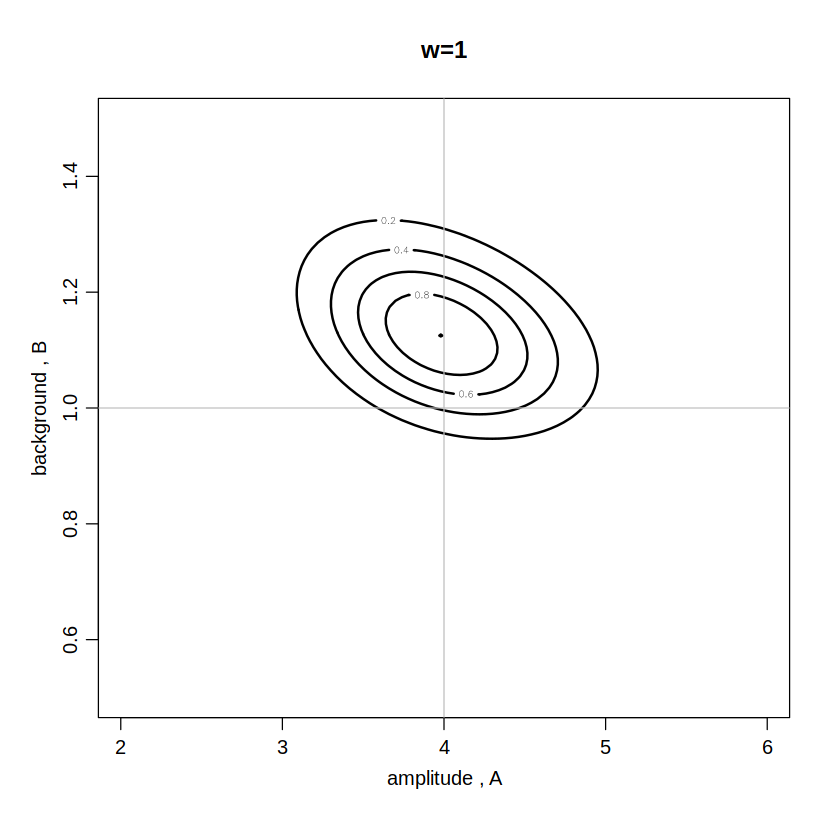

In [155]:
#Sampling grid for computing posterior
alim <- c(2.0, 6.0)  #a_true=2
blim <- c(0.5, 1.5) #b_true = 1
Nsamp <- 100

grid <- compute_sampling_grid(alim, blim, Nsamp)
a <- grid$a
b <- grid$b
delta_a <- grid$delta_a
delta_b <- grid$delta_b

# Loop over each value of w and produce a contourplot of the posterior for each
par(mfrow=c(1, 1), mar=c(5, 4, 4, 2) + 0.1, mgp=c(2, 0.7, 0))
z_list <- vector(mode = "list", length = length(w_list))

for (i in 1:length(w_list)) {
    w <- w_list[i]
    x <-  x_list[[i]] 
    data <-  data_list[[i]] 
    
# Compute log unnormalized posterior, z = ln P*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
        z[j,k] <- log.post(data, x, a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    z_list[[i]] <- z

  # Plot unnormalized 2D posterior as contour plot
  contour(a, b, exp(z), nlevels=5, labcex=0.5, lwd=2, xlab="amplitude , A", ylab="background , B", main=paste0("w=", w))
  abline(v=4, h=1, col="grey")
}

linetype,label
____,"p(b|D), p(a|D)"
- - - -,"p(b|a,D), p(a|bD)"


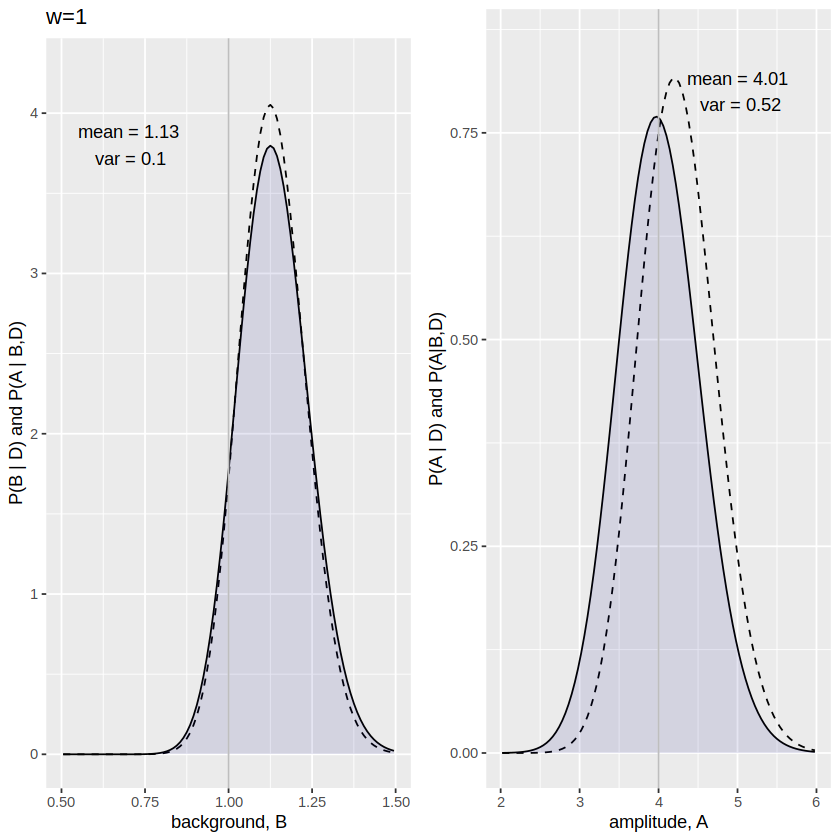

In [156]:
library(ggplot2)
library(gridExtra)

legend_df <- data.frame(
  linetype = c("____", "- - - -"),
  label = c("p(b|D), p(a|D)", "p(b|a,D), p(a|bD)")
)
legend_df

for (i in 1:length(w_list)) {
    z <- z_list[[i]] 
    w <- w_list[i]
    x <-  x_list[[i]] 
    data <-  data_list[[i]] 
    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    result <- compute_posteriors(z = z, delta_a = delta_a, delta_b = delta_b)
    p_a_D <- result$p_a_D
    p_b_D <- result$p_b_D

    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    result_c <- compute_conditional_posteriors(data, x, a, b, B.true , x0, w, Delta.t )
    p_a_bD <- result_c$p_a_bD
    p_b_aD <-  result_c$p_b_aD
    
    #Compute mean and variance for a and b
    mean_a <-delta_a * sum(a * p_a_D)
    mean_b <-delta_b * sum(b * p_b_D)
    sd_a <-sqrt( delta_a * sum ((a-mean_a)**2 * p_a_D) )
    sd_b<-sqrt( delta_b * sum ((b-mean_b)**2 * p_b_D) )
    
    # Plot the 1D marginalized posteriors
    # Create data frame
    df <- data.frame(b, p_b_D, p_b_aD)
    df2 <- data.frame(a, p_a_D, p_a_bD)

    # Create plots
    plot1 <- ggplot(df, aes(x = b, y = p_b_D)) + 
      geom_line(lwd = 0.5) + 
      geom_line(aes(y = p_b_aD), linetype = "dashed", lwd = 0.5) +
      geom_area( fill = "navy", alpha = 0.1) +
      scale_x_continuous(name = "background, B") +
      scale_y_continuous(name = "P(B | D) and P(A | B,D)", limits = c(0, 1.05 * max(df$p_b_D, df$p_b_aD))) +
      labs(title = paste0("w=", w)) +
      geom_vline(xintercept = B.true, col = "grey") +
      annotate("text", x = 0.7, y = 3.8, label = paste0("mean = ", round(mean_b,2), "\n var = ", round(sd_b,2)), col = "black")
      theme_minimal()

    plot2 <- ggplot(df2, aes(x = a, y = p_a_D)) + 
      geom_line(lwd = 0.5) + 
      geom_line(aes(y = p_a_bD), linetype = "dashed", lwd = 0.5) +
      geom_area( fill = "navy", alpha = 0.1) +
      scale_x_continuous(name = "amplitude, A") +
      scale_y_continuous(name = "P(A | D) and P(A|B,D)", limits = c(0, 1.05 * max(df2$p_a_D, df2$p_a_bD))) +
      geom_vline(xintercept = A.true, col = "grey") +
      annotate("text", x = 5, y = 0.8, label = paste0("mean = ", round(mean_a,2), "\n var = ", round(sd_a,2)), col = "black")
      theme_minimal()
# Combine plots
grid.arrange(plot1, plot2, ncol = 2)
}

#### b.2) Lower A/B, stronger background

In [158]:
# Define the parameters of the model
x0 <- 0                                 #Signal center (peak)
w_list<- c(1)                      #Signal width
A.true <- 2                         #Signal amplitude
B.true <- 5                         #Background amplitude
Delta.t <- 5                       #Exposure time


par(mfrow=c(3,2), mar=c(5,5,1,1))
x_list <- vector(mode = "list", length = length(w_list))
data_list <- vector(mode = "list", length = length(w_list))

for (i in 1:length(w_list)) {
    
    # Generate the S (expected data) and the observed data
    set.seed(123)
    x <- seq(from=-7*w_list[i], to=7*w_list[i], by=0.5*w_list[i])                 #values {x_k}
    s_x <- generate_signal (x , A.true , B.true , x0, w_list[1], Delta.t)       #expected photons S_k 
    data <- rpois( length(s_x), s_x)                                                                       #random sample of Poisson distribution, observed photons
    
    #keep data and x_k in memory
    x_list[[i]] <- x
    data_list[[i]] <- data
    
}


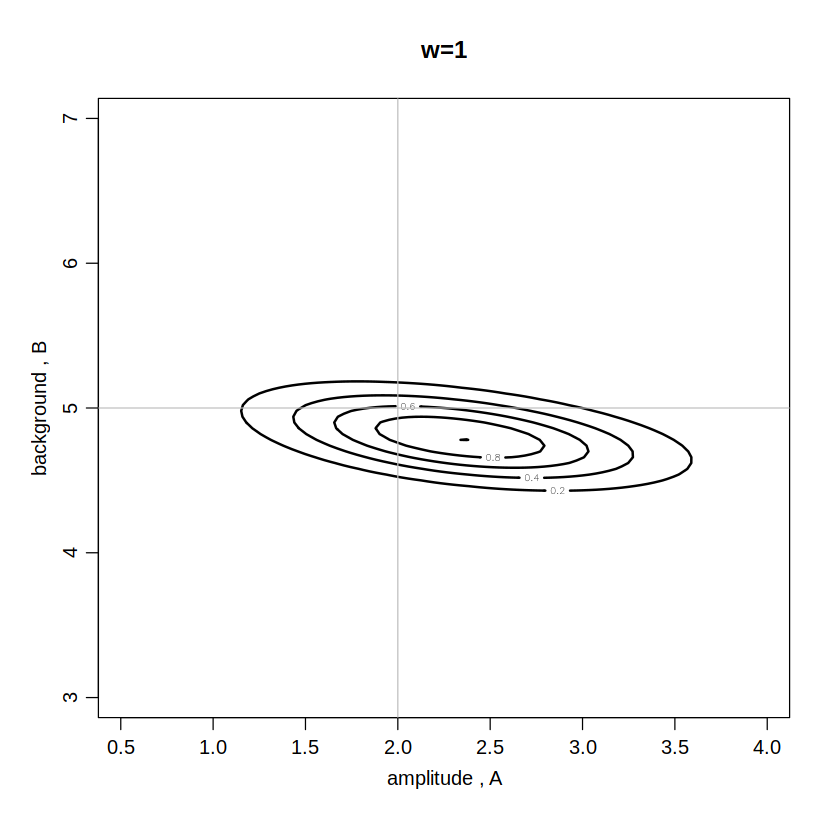

In [159]:
#Sampling grid for computing posterior
alim <- c(0.5, 4.0)  #a_true=2
blim <- c(3.0, 7.0) #b_true = 1
Nsamp <- 100

grid <- compute_sampling_grid(alim, blim, Nsamp)
a <- grid$a
b <- grid$b
delta_a <- grid$delta_a
delta_b <- grid$delta_b

# Loop over each value of w and produce a contourplot of the posterior for each
par(mfrow=c(1, 1), mar=c(5, 4, 4, 2) + 0.1, mgp=c(2, 0.7, 0))
z_list <- vector(mode = "list", length = length(w_list))

for (i in 1:length(w_list)) {
    w <- w_list[i]
    x <-  x_list[[i]] 
    data <-  data_list[[i]] 
    
# Compute log unnormalized posterior, z = ln P*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
        z[j,k] <- log.post(data, x, a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    z_list[[i]] <- z

  # Plot unnormalized 2D posterior as contour plot
  contour(a, b, exp(z), nlevels=5, labcex=0.5, lwd=2, xlab="amplitude , A", ylab="background , B", main=paste0("w=", w))
  abline(v=2, h=5, col="grey")
}

linetype,label
____,"p(b|D), p(a|D)"
- - - -,"p(b|a,D), p(a|bD)"


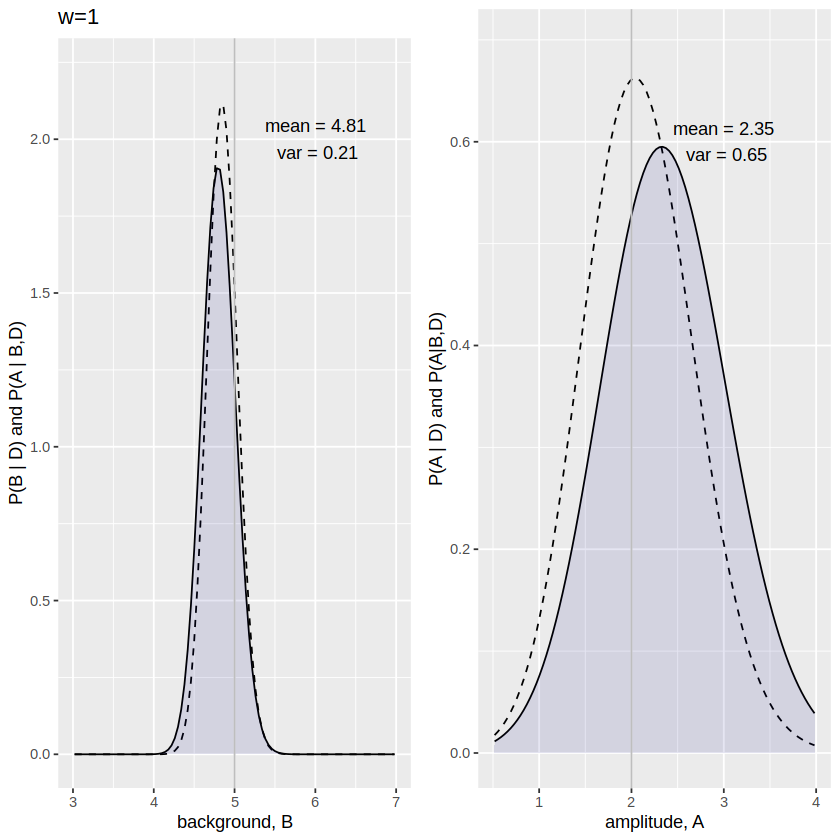

In [160]:
library(ggplot2)
library(gridExtra)
legend_df <- data.frame(
  linetype = c("____", "- - - -"),
  label = c("p(b|D), p(a|D)", "p(b|a,D), p(a|bD)")
)
legend_df

for (i in 1:length(w_list)) {
    z <- z_list[[i]] 
    w <- w_list[i]
    x <-  x_list[[i]] 
    data <-  data_list[[i]] 
    
    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    result <- compute_posteriors(z = z, delta_a = delta_a, delta_b = delta_b)
    p_a_D <- result$p_a_D
    p_b_D <- result$p_b_D

    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    result_c <- compute_conditional_posteriors(data, x, a, b, B.true , x0, w, Delta.t )
    p_a_bD <- result_c$p_a_bD
    p_b_aD <-  result_c$p_b_aD
    
    #Compute mean and variance for a and b
    mean_a <-delta_a * sum(a * p_a_D)
    mean_b <-delta_b * sum(b * p_b_D)
    sd_a <-sqrt( delta_a * sum ((a-mean_a)**2 * p_a_D) )
    sd_b<-sqrt( delta_b * sum ((b-mean_b)**2 * p_b_D) )
    
    # Plot the 1D marginalized posteriors
    # Create data frame
    df <- data.frame(b, p_b_D, p_b_aD)
    df2 <- data.frame(a, p_a_D, p_a_bD)

    # Create plots
    plot1 <- ggplot(df, aes(x = b, y = p_b_D)) + 
      geom_line(lwd = 0.5) + 
      geom_line(aes(y = p_b_aD), linetype = "dashed", lwd = 0.5) +
      geom_area( fill = "navy", alpha = 0.1) +
      scale_x_continuous(name = "background, B") +
      scale_y_continuous(name = "P(B | D) and P(A | B,D)", limits = c(0, 1.05 * max(df$p_b_D, df$p_b_aD))) +
      labs(title = paste0("w=", w)) +
      geom_vline(xintercept = B.true, col = "grey") +
      annotate("text", x = 6, y = 2, label = paste0("mean = ", round(mean_b,2), "\n var = ", round(sd_b,2)), col = "black")
      theme_minimal()

    plot2 <- ggplot(df2, aes(x = a, y = p_a_D)) + 
      geom_line(lwd = 0.5) + 
      geom_line(aes(y = p_a_bD), linetype = "dashed", lwd = 0.5) +
      geom_area( fill = "navy", alpha = 0.1) +
      scale_x_continuous(name = "amplitude, A") +
      scale_y_continuous(name = "P(A | D) and P(A|B,D)", limits = c(0, 1.05 * max(df2$p_a_D, df2$p_a_bD))) +
      geom_vline(xintercept = A.true, col = "grey") +
      annotate("text", x = 3, y = 0.6, label = paste0("mean = ", round(mean_a,2), "\n var = ", round(sd_a,2)), col = "black")
      theme_minimal()
# Combine plots
grid.arrange(plot1, plot2, ncol = 2)
}

Changing the ratio A/B affects the shape and amplitude of the signal in the data, as well as the level of background noise relative to the signal. A higher A/B ratio corrisponds to a stronger signal relative to the background noise, making it easier to detect and estimate the parameters of the signal. On the other hand, a lower A/B ratio leads to  a weaker signal relative to the background noise, resulting in a higher relative error in the estimation of the amplitude.